<a href="https://colab.research.google.com/github/petitmeau/Python-VMP/blob/main/VMP_auto_Notebook_PCA_and_tSNE_Project_FullCode_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA and t-SNE Project: Auto MPG**

# **Marks: 30**

Welcome to the project on PCA and t-SNE. In this project, we will be using the **auto-mpg dataset**.


-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

%matplotlib inline

### **Loading the data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT/Elective project/auto-mpg.csv')

### **Data Overview**

- Observations
- Sanity checks




In [ ]:
# look at first 5 rows of the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
# looking at the shape of the data
df.shape

(398, 8)

There are 398 rows and 8 columns

In [ ]:
#obtaining infos about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Horsepower and car name are object.Horsepower should be float or integer not object. Let's look at all values for horsepower
Other parameters are either integers or floats.



## **Data Preprocessing and Exploratory Data Analysis**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- Missing value treatment
- Feature engineering (if needed)
- Check the correlation among the variables
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)



In [ ]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Some horsepower data are '?' and should be treated: either we will replace them by some mean or average if we have enough data, or we can remove rows with these missing data


In [ ]:
#looking at the profile of missing data
df_missing = df[df['horsepower'] == '?']
df_missing.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
32,25.0,4,98.0,?,2046,19.0,71,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,renault 18i


There are horsepower missing data for 5 different cars. So this is not missing for only 1 category of cars. I will look at the horsepower values for each car name to see if I can replace the missing value by median or average value within each car brand

In [ ]:
#look if for each car name, missing data be extrapolated from other cars with same name
for car in df_missing['car name']:

  print ('for', car, '\n', df[df['car name'] == car], '\n')


for ford pinto 
       mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
112  19.0          4         122.0         85    2310          18.5   
130  26.0          4         122.0         80    2451          16.5   
168  23.0          4         140.0         83    2639          17.0   
174  18.0          6         171.0         97    2984          14.5   
206  26.5          4         140.0         72    2565          13.6   

     model year    car name  
32           71  ford pinto  
112          73  ford pinto  
130          74  ford pinto  
168          75  ford pinto  
174          75  ford pinto  
206          76  ford pinto   

for ford maverick 
       mpg  cylinders  displacement horsepower  weight  acceleration  \
17   21.0          6         200.0         85    2587          16.0   
100  18.0          6         250.0         88    3021          16.5   
126  21.0          6         200.0      

**Some car names are single in the group of missing horsepower data** and can thus not be extrapolated. This is the case for renault lecar deluxe, ford mustang cobra, renault 18i and amc concord dl. For these cars, I will remove the rows as I cannot extrapolate new data from other data.

**Ford Pinto and Ford Maverick** have data on horsepower from other cars, but they are very variable. We could choose to replace missing data with the average or by removing it. As they are very few of them, I decided to remove them from the dataset.

In [ ]:
#Replace '?' string by Nan in horsepower and remove row with missing value
df['horsepower'] = df['horsepower'].replace('?', np.NaN)
df.dropna(inplace=True)

In [ ]:
#check type of data for horsepower
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   car name      392 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 27.6+ KB


Horsepower is still object. It means either there are other strings or data have to be converted into integers

In [ ]:
#check there is no remaining string in horsepower
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

There is no other string data, so I can convert all data into integers

In [ ]:
# No remaining string, so we can convert these values to integers
df['horsepower'] = df['horsepower'].astype(int)

In [ ]:
#check final info for df
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
car name         object
dtype: object

Horsepower is now integer type

In [ ]:
#Check for duplicates
df.duplicated().value_counts()

False    392
Name: count, dtype: int64

There is no duplicate

### **Summary Statistics**

In [ ]:
# Describe the data for numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [ ]:
# Describe data for categorical values
df.describe (include='object').T

,count,unique,top,freq
car name,392,301,amc matador,5


There are 301 different car names, and the most frequent one is amc matador.
Maybe other cars are as frequent as amc matador.

In [ ]:
df['car name'].value_counts()

car name
amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: count, Length: 301, dtype: int64

Ford pinto, toyota corolla  are also present 5 times in the data set.
However we will not use this column data and will remove it from our analysis

Skew : 0.46


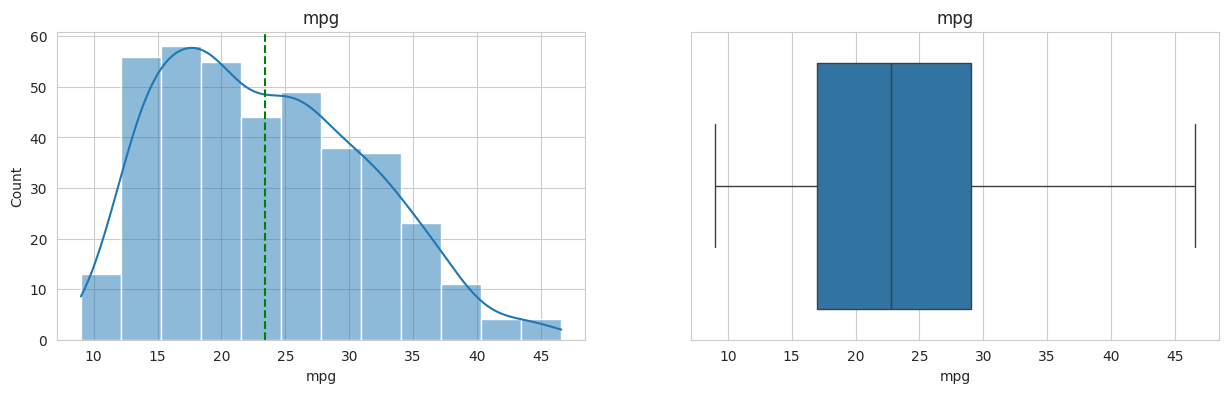

Skew : 0.51


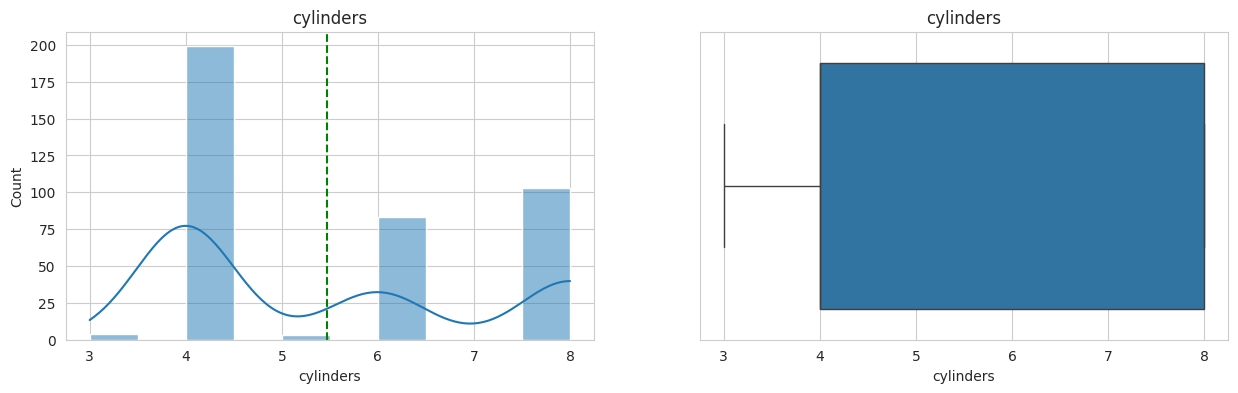

Skew : 0.7


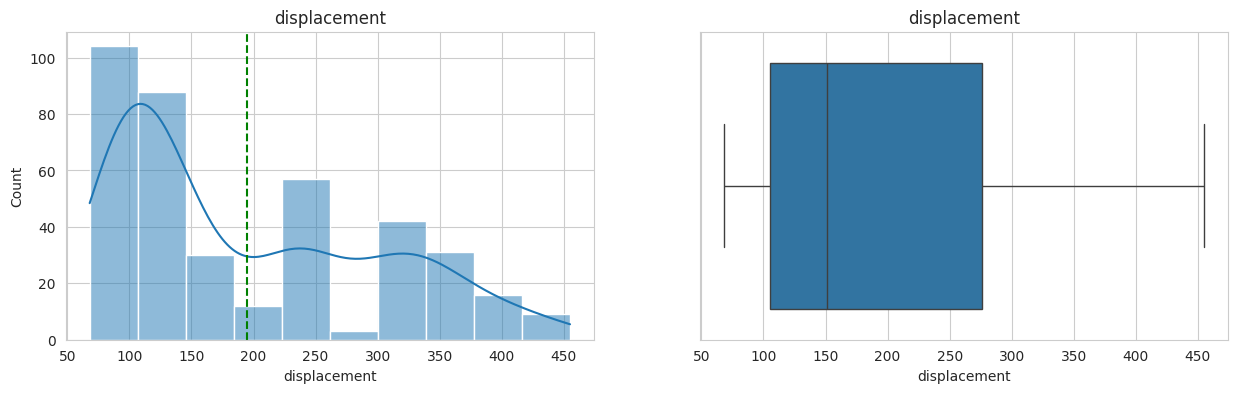

Skew : 1.09


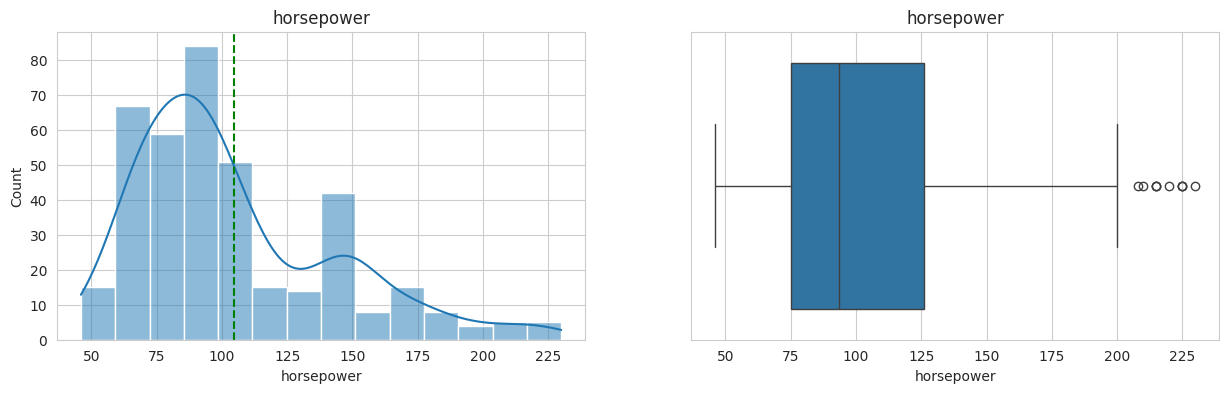

Skew : 0.52


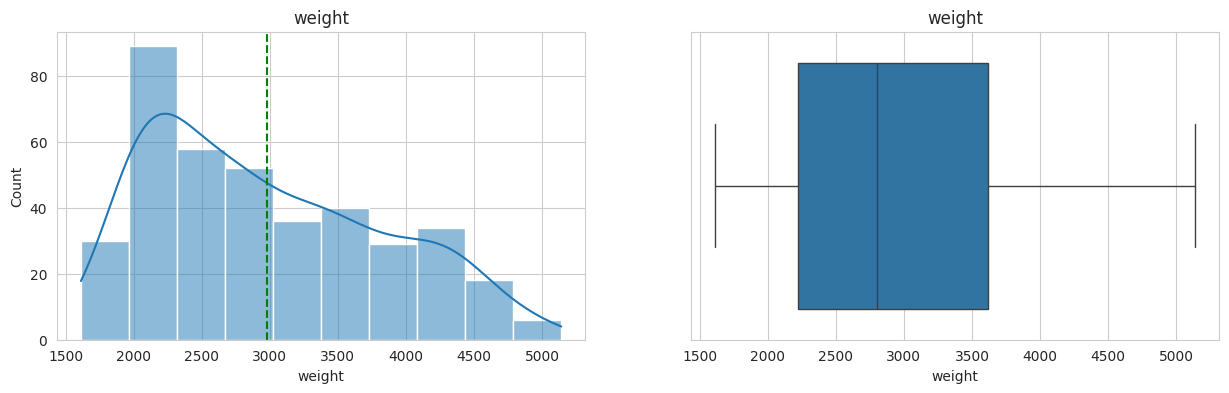

Skew : 0.29


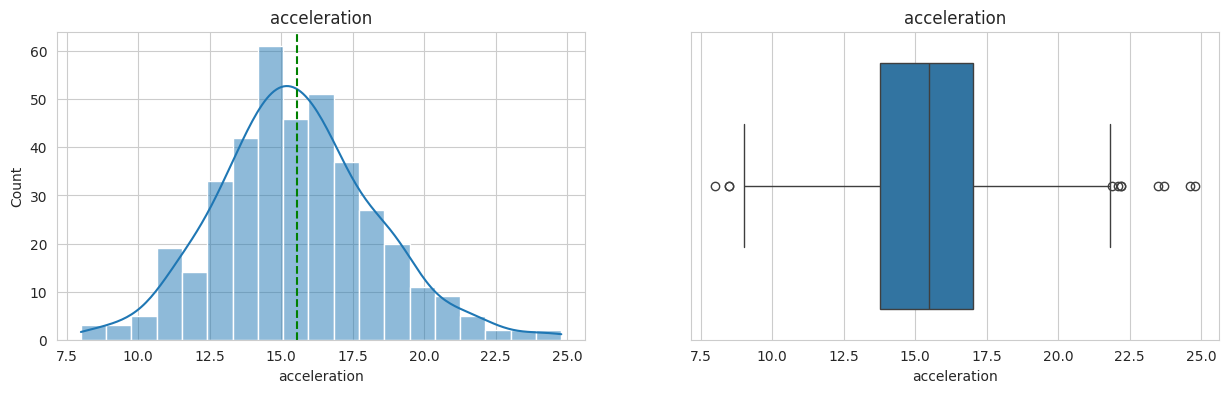

Skew : 0.02


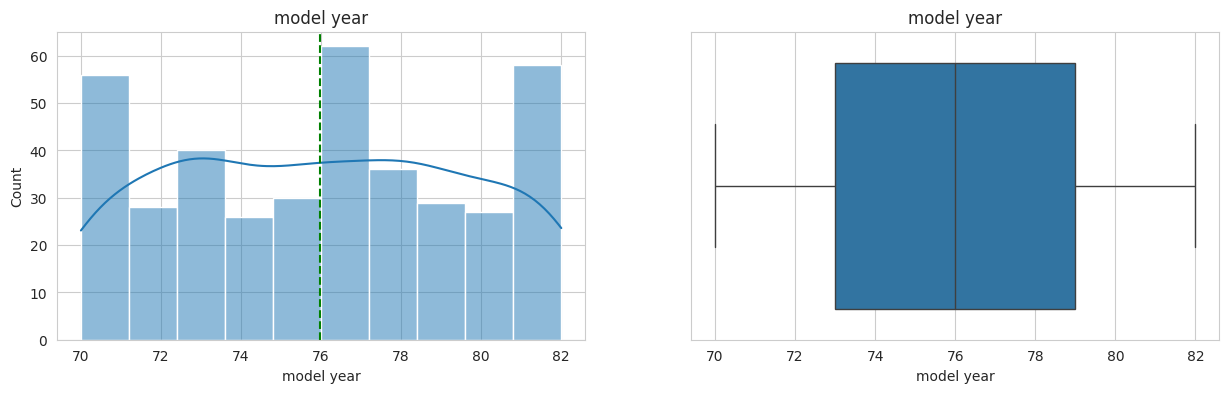

In [ ]:
#univariate data analysis for numerical values
# creating histograms and box plots for each variable

df_numerical = df[['mpg','cylinders', 'displacement', 'horsepower','weight', 'acceleration', 'model year']]
j=0

for i in df_numerical:

  fig, ax = plt.subplots(1,2, figsize = (15,4))

  plt.subplot(1,2,1)
  print('Skew :', round(df[i].skew(), 2))
  sns.set_style("whitegrid")
  sns.histplot( x = df_numerical[i], data = df_numerical, kde= True)
  plt.axvline (x=df[i].mean(), color='g', linestyle ='--')

  plt.title(df_numerical.columns[j])

  plt.subplot(1,2,2)
  sns.boxplot( x = df_numerical[i], data = df_numerical)
  plt.title(df_numerical.columns[j])

  j+=1

  plt.show()


**mpg:** Right skewed distribution. Mean 23.4, median 22.5. No outlier

**cylinders:** 3 main values: 4, 6 and 7.5. Multimodal distribution.

**displacement:** right skewed distribution. Mean 194, median 151. No outlier

**Horsepower:** right skewed distribution. Mean 104  Median 93. Lots of outliers in high values

**Weight:** Right skewed distribution. Mean. 2977 median 2803, no outlier

**Acceleration:** Normal distribution. Mean = Median =15.5

**Model year:** some uniform distribution with 4 years which are more frequent. However they are not easy to identify on this histogram. I will thus look at it with value_counts method.

In [ ]:
df['model year'].value_counts()

model year
73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: count, dtype: int64

The 3 more frequent years are 1963, 1978 and 1976.

In [ ]:
# create a data set for categorical data:
df_categorical = df['car name']

df_categorical.value_counts()


car name
amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: count, Length: 301, dtype: int64

Thsi will not be useful for data analysis as there are 301 different car names, so we will drop this column

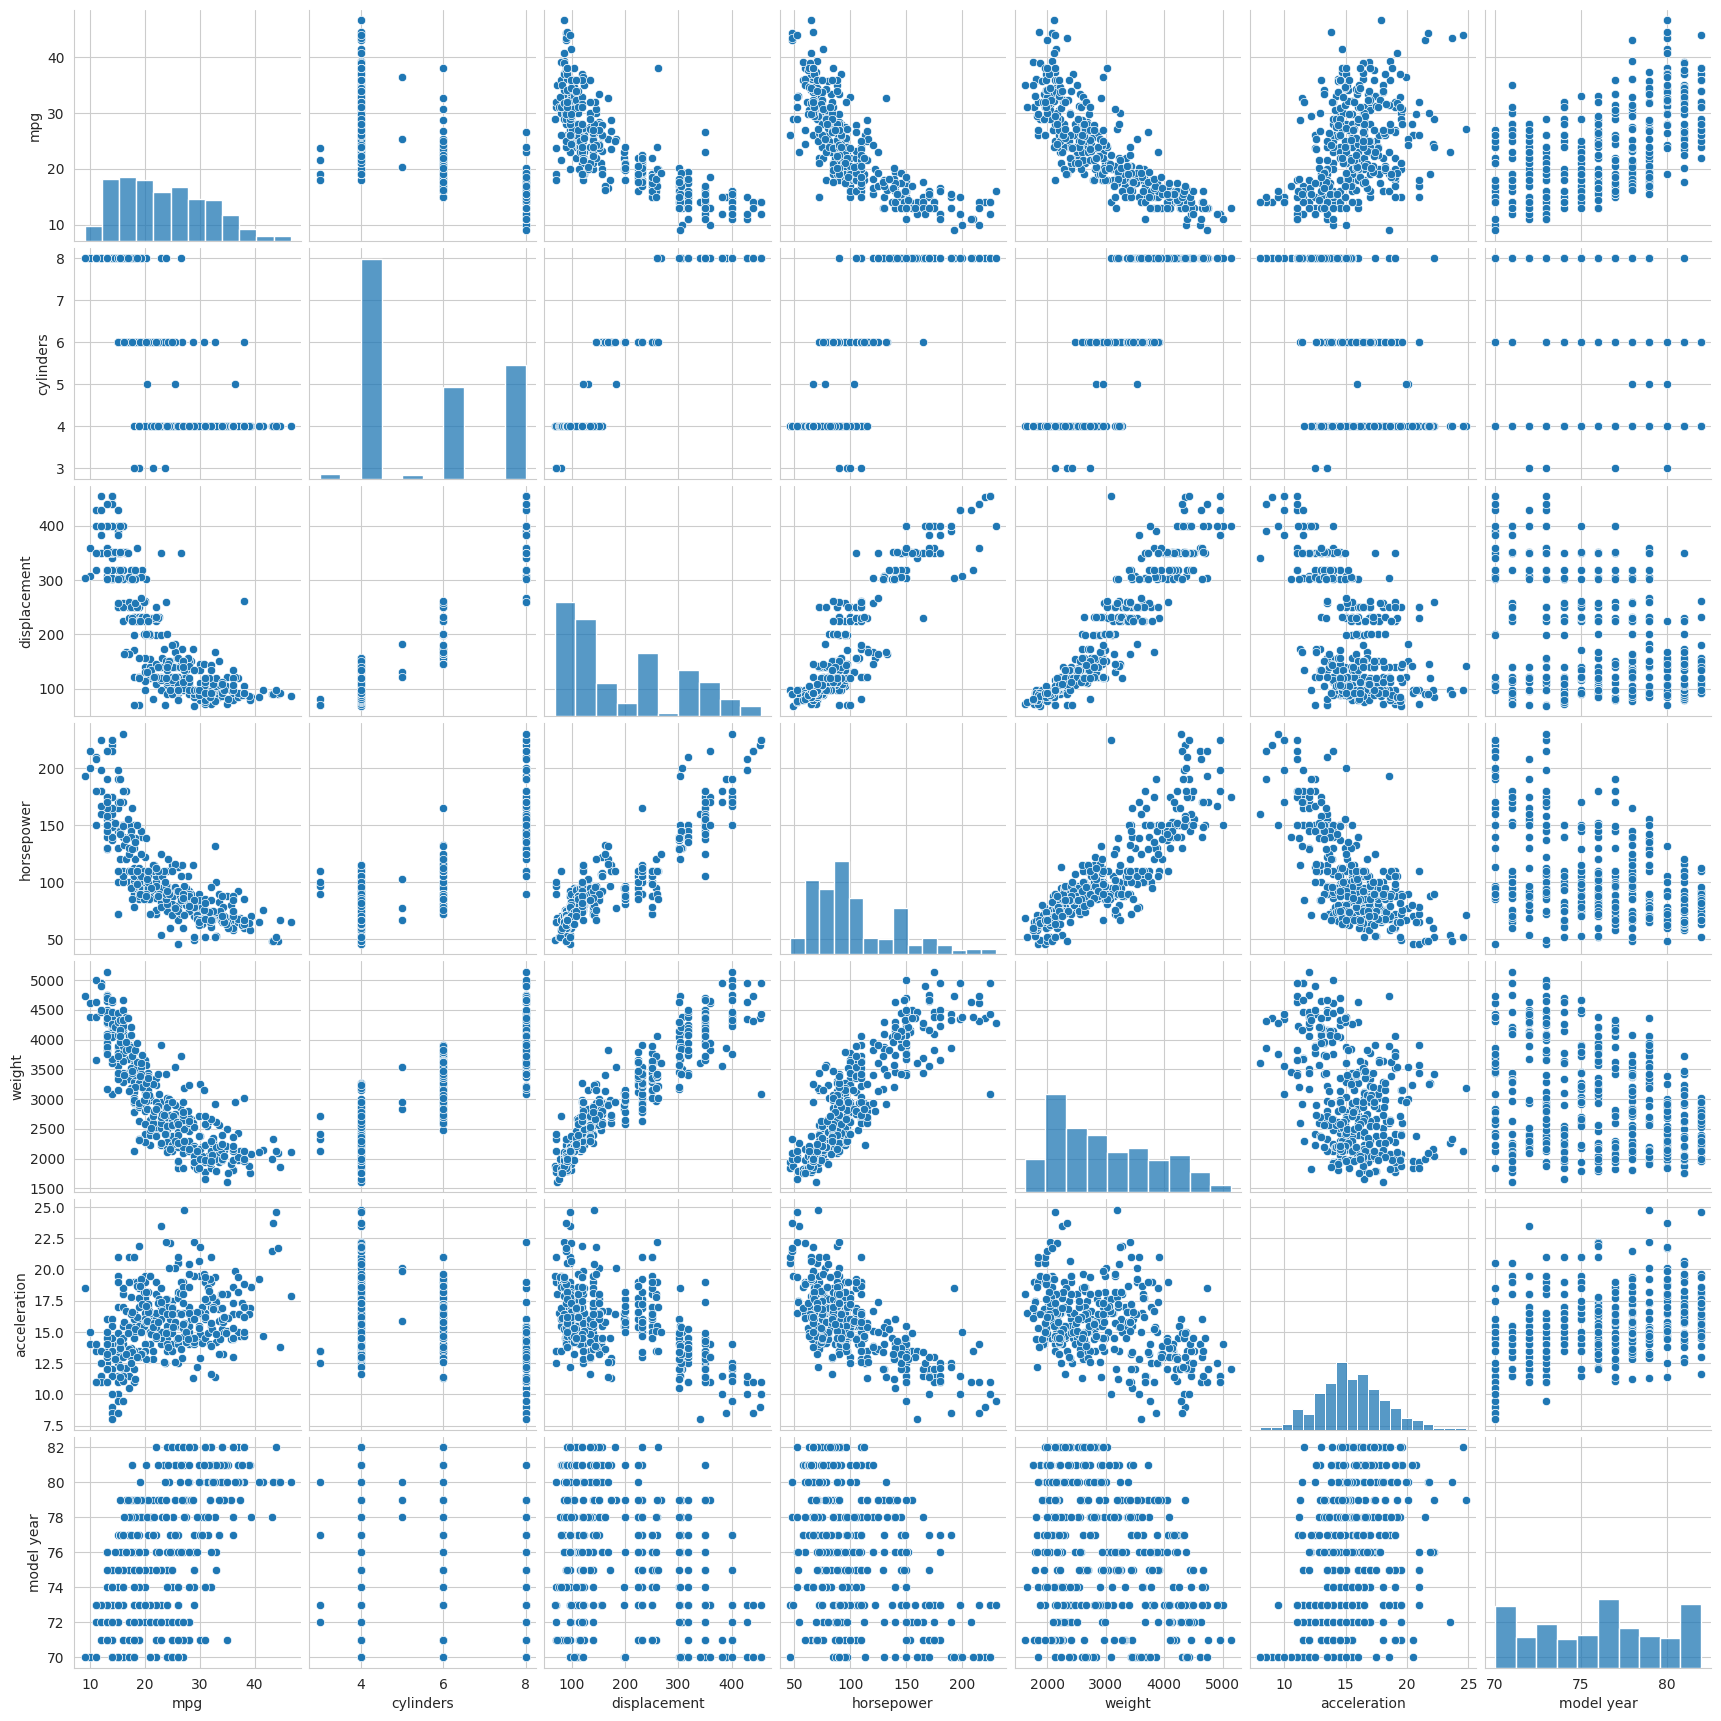

In [ ]:
# correlation between all variables: bivariate analysis for numerical values
sns.pairplot(df, corner= False)
plt.show()

**Variables are globally strongly correlated:**

There is strong negative linear correlation between **mpg** and displacement, horsepower, weight and cylinders. Positive linear correlation between mpg and acceleration.

**Cylinders:**positively correlated with displacement, horsepower, weight. Negatively correlated with acceleration and mpg.

**Displacement:**  positively correlated with horsepower, weight and cylinders. Negatively correlated with mpg, acceleration.

**Horsepower:** Positively correlated with weight, displacement and cylinders. Negatively correlated with acceleration and mpg.

**Weight:** Positively correlated with horsepower, displacement and cylinders. Negatively correlated with weight, mpg and model year.

**Acceleration:** positive correlation with mpg and model year. Negative correlation with weight, displacement and horsepower and cylinders.

**Model year** is not correlated with any other variable.

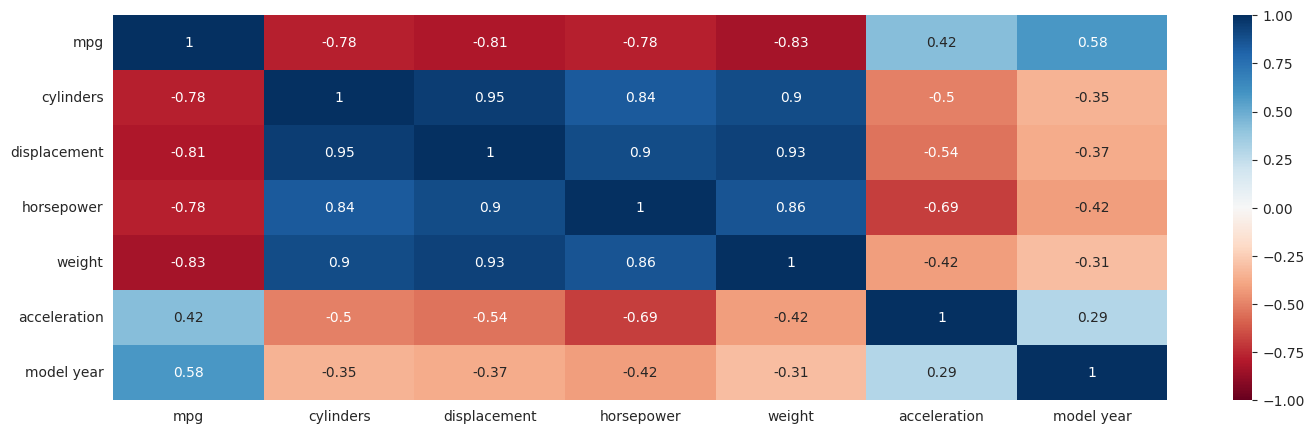

In [ ]:
# correlation between numerical variables

fig = plt.figure(figsize=(17,5))

sns.heatmap(df_numerical.corr(), annot = True, cmap='RdBu', vmin=-1, vmax=1)
plt.show()


This heat map confirms all the strong correlations detailed above in the pairplot.

In [ ]:
#working on a copy of the numerical data only. We have dropped car name column.
df_copy = df_numerical

**Observations:**
We have treated missing values.
Multivariate analysis have shown strong correlation bewteen many variables, as detailed above. There already seem to be a pattern with 2 groups of strongly correlated variables:
mpg, acceleration and modely year
Cylinders, displacement, horsepower, weight.
Let's confirm this with a neural network

In [ ]:
# looking at distance between variables in a network
!pip install networkx

In [ ]:
import networkx as nx

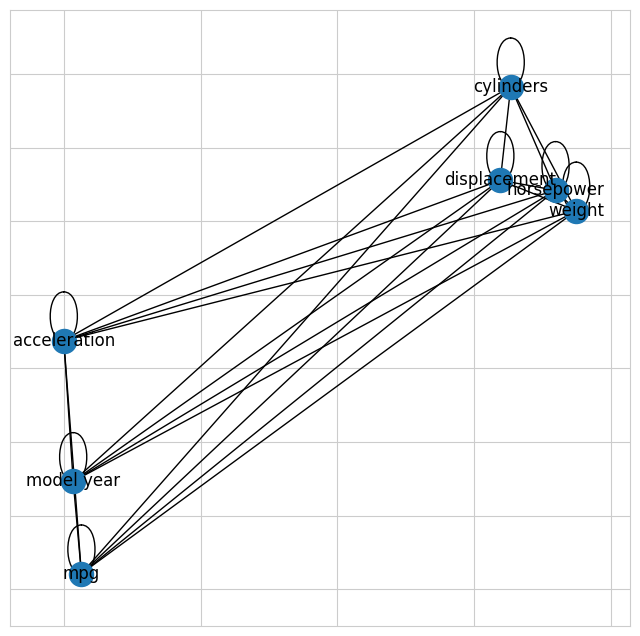

In [ ]:
G = nx.Graph(df_numerical.corr())

figure = plt.figure(figsize = (8,8))
nx.draw_networkx(G, with_labels = True)

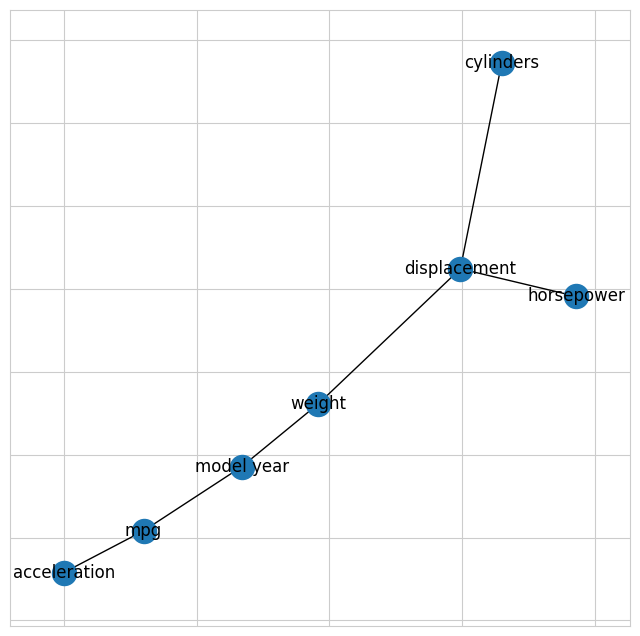

In [ ]:
#filter usinf the MST tree
distance = np.sqrt(2*(1-df_numerical.corr()))
distance_graph = nx.Graph(distance)
graph_filtered = nx.minimum_spanning_tree(distance_graph)
figure = plt.figure(figsize = (8,8))
nx.draw_networkx(graph_filtered, with_labels = True)

This neural network confirmed our intuition above

There seems to be 2 groups of strongly positively correlated variables: **cylinders, weight, displacement and horsepower**. They also all showed strong positive correlation on the heatmap.

The second group is **mpg, acceleration and model year,** which are also strongly correlated on the heatmap.

This graphic representation of neural network confirms fruther data provided by pairplot and heatmap.


### **Scaling the data**

In [ ]:
# Scaling the data and storing the output as a new DataFrame

scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(df_copy), columns = df_copy.columns)

data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


In [ ]:
data_scaled.shape

(392, 7)

In [ ]:
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep = True)
data_scaled_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


## **Principal Component Analysis**

In [ ]:
# Defining the number of principal components to generate
n = data_scaled_copy.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 42)
data_scaled_copy_pca = pd.DataFrame(pca1.fit_transform(data_scaled_copy))

data_scaled_copy_pca

# The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_
exp_var1

array([0.71580512, 0.12365591, 0.10405625, 0.02627358, 0.01741662,
       0.00775102, 0.00504149])

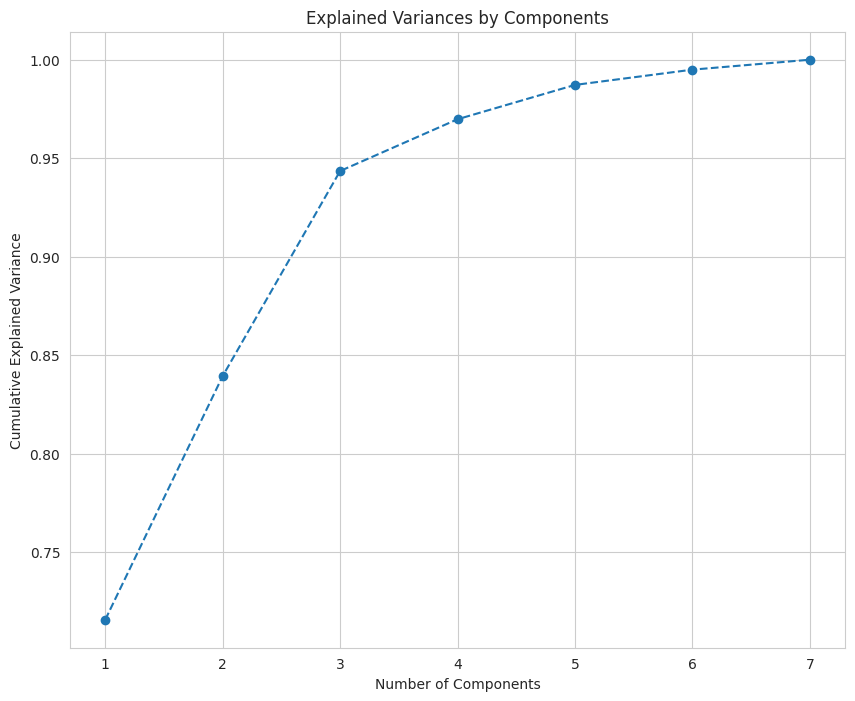

In [ ]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 8))

plt.plot(range(1, 8), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [ ]:
data_scaled_copy_pca

,0,1,2,3,4,5,6
0,2.635049,0.929039,-0.534679,0.745590,-0.546008,-0.094974,-0.122078
1,3.493800,0.805473,-0.649495,0.494829,-0.035636,0.207134,0.097861
2,2.970415,0.881186,-0.958742,0.719725,-0.286908,0.136587,-0.059750
3,2.910197,0.961721,-0.582953,0.531489,-0.283952,0.293239,-0.124521
4,2.903826,0.952789,-1.054836,0.565102,-0.544802,-0.001897,-0.170826
...,...,...,...,...,...,...,...
387,-1.440898,-1.226641,-0.311195,-0.673363,0.069950,-0.191146,0.104669
388,-4.112474,-1.330384,1.939727,1.358522,0.754758,0.220691,0.084173
389,-1.566816,-1.225221,-1.930098,-0.316704,-0.235479,-0.264503,0.147568
390,-2.041842,-1.151837,0.586433,-0.473528,0.194645,0.093235,0.077905


In [ ]:
#Display coefficients for each PCA
pca1.components_

array([[-0.39813476,  0.41612416,  0.42928265,  0.42281287,  0.41404571,
        -0.28489711, -0.22951004],
       [-0.20675864, -0.19854113, -0.18036242, -0.08524183, -0.22467457,
         0.00697163, -0.9096748 ],
       [-0.25721494,  0.13915928,  0.1003161 , -0.16968441,  0.27610337,
         0.89330772, -0.03724635],
       [ 0.75096624,  0.47730649,  0.29784705, -0.04207625, -0.10773508,
         0.12112398, -0.30243525],
       [ 0.34077556, -0.49322226, -0.05658084,  0.71128893,  0.26515768,
         0.23075501, -0.08896075],
       [-0.20975889,  0.3325483 , -0.14296713,  0.52280252, -0.69651778,
         0.22378488,  0.12819545],
       [-0.09221162, -0.43171605,  0.81287676, -0.06438539, -0.36715386,
         0.05279944,  0.05113155]])

#### **Interpret the coefficients of the first three principal components from the below DataFrame**

**Observations:___________________**
The variance graph shows that the 3 main components explain most of the global variance (95%). The first PCA explain more than 70% of the variance.

**The first PCA:** mpg, acceleration and model year have strong negative coefficient, whereas cylinders, displacement, horsepower and weight have strong positive coefficients. This reflects well what we observe on original data set multivariate analysis.

**The second PCA:** strong influence of model year, then mpg, cylinders and weight

**The third PCA:** stong influence of acceleration, then mpg, weight and horsepower.

**First PCA show more balanced and strong influence of all variables. It reflects well original data.** Second and third PCA reflect more model year (PCA2) and acceleration (PCA3).

In [ ]:
#. better representation of the data PCA and variables
cols = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7']

pc1 = pd.DataFrame(np.round(pca1.components_.T[:, 0:7], 2),index = data_scaled_copy.columns, columns = cols )
pc1

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
mpg,-0.40,-0.21,-0.26,0.75,0.34,-0.21,-0.09
cylinders,0.42,-0.20,0.14,0.48,-0.49,0.33,-0.43
displacement,0.43,-0.18,0.10,0.30,-0.06,-0.14,0.81
horsepower,0.42,-0.09,-0.17,-0.04,0.71,0.52,-0.06
weight,0.41,-0.22,0.28,-0.11,0.27,-0.70,-0.37
acceleration,-0.28,0.01,0.89,0.12,0.23,0.22,0.05
model year,-0.23,-0.91,-0.04,-0.30,-0.09,0.13,0.05


#### **Visualize the data in 2 dimensions using the first two principal components**



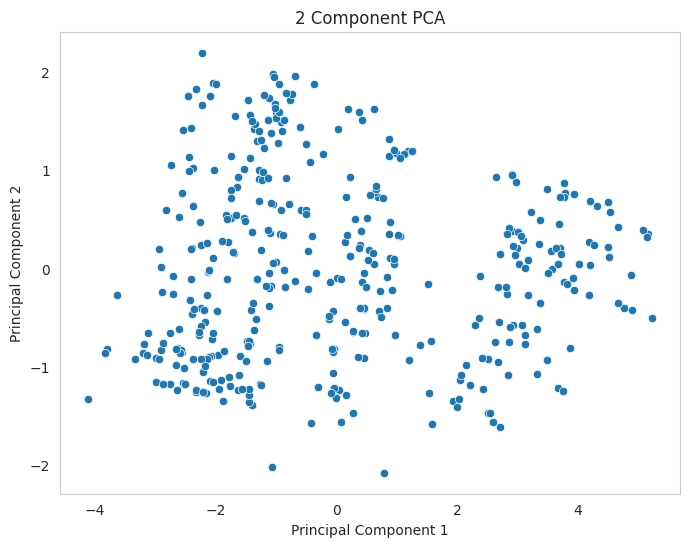

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled_copy_pca.iloc[:,0], y=data_scaled_copy_pca.iloc[:,1], data=data_scaled_copy_pca)
plt.title('2 Component PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

It seems that we can speculate about 3 main clusters visually and this could potentiall fit well with cylinders (also 3 groups)

In [ ]:
# adding PCA1 and 2 to the data_scaled data frame. Objective will be to visualize the same scatter plot as above with hue on cylinders
data_scaled_copy['PCA1'] = data_scaled_copy_pca.iloc[:,0]
data_scaled_copy['PCA2'] = data_scaled_copy_pca.iloc[:,1]
data_scaled_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,PCA1,PCA2
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,2.635049,0.929039
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,3.493800,0.805473
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,2.970415,0.881186
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,2.910197,0.961721
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,2.903826,0.952789


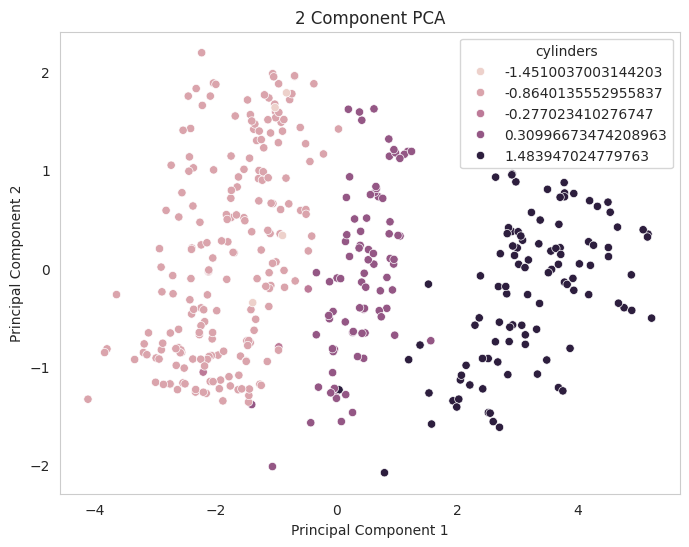

In [ ]:
#scatterplot with hue = cylinders
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled_copy_pca.iloc[:,0], y=data_scaled_copy_pca.iloc[:,1], data=data_scaled_copy, hue = 'cylinders')
plt.title('2 Component PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

**Observations:___________**
First and second component reflects well the data, which can be clustered in different groups based on cylinders.

Group 1: group of cars with lower number of cylinders (4)

Group 2: medium number of cylinders (6).

Grtoup 3: higher number of cylinders (8).

## **t-SNE**

In [ ]:
# lets recover initial dataset
# Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep = True)
data_scaled_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315


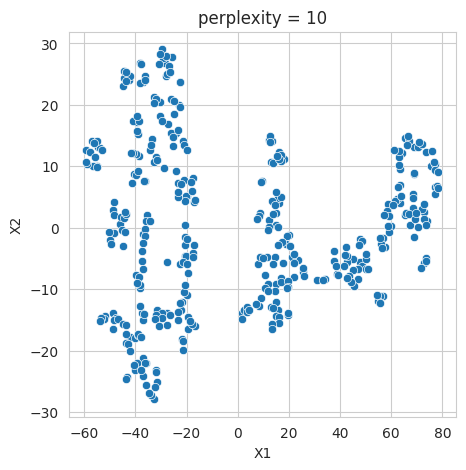

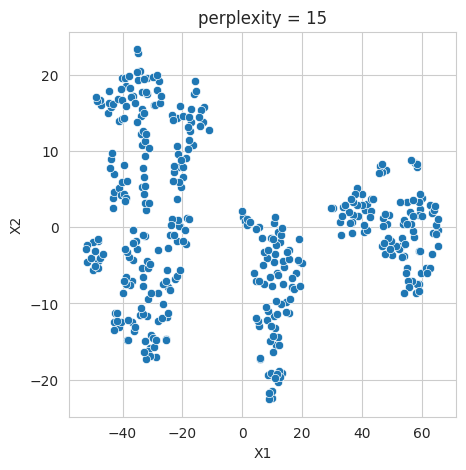

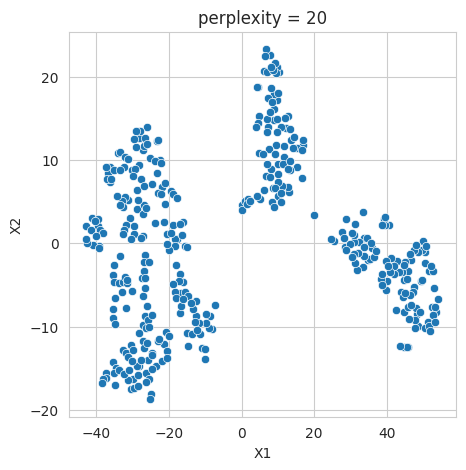

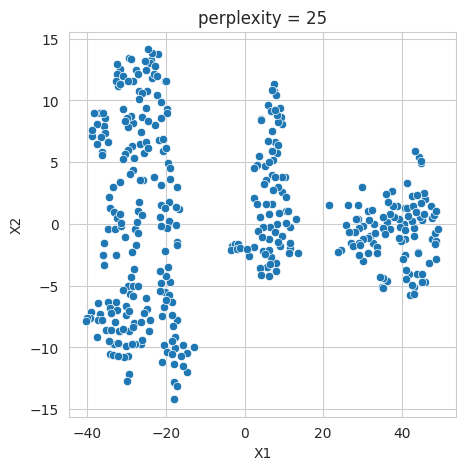

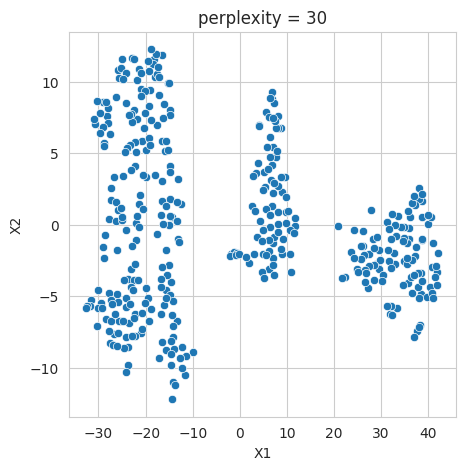

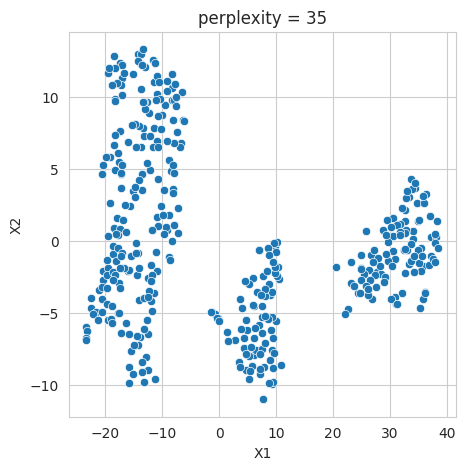

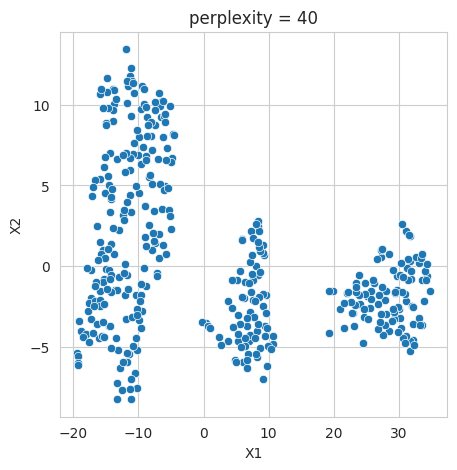

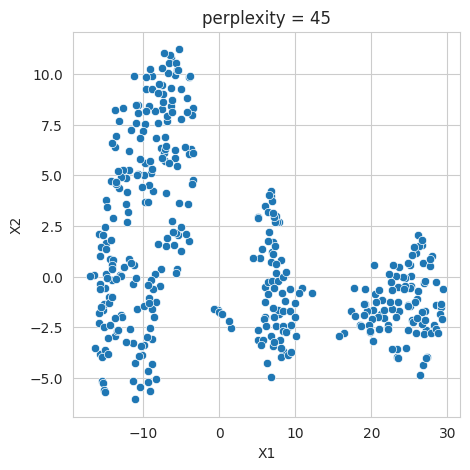

In [ ]:
#Let's try to visualize the data for different perplexity values

for i in range(10, 50, 5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)

    data_scaled_copy_tsne = tsne.fit_transform(data_scaled_copy)

    data_scaled_tsne = pd.DataFrame(data_scaled_copy_tsne)

    data_scaled_tsne.columns = ['X1', 'X2']

    plt.figure(figsize = (5,5))

    sns.scatterplot(x = 'X1', y = 'X2', data = data_scaled_tsne)

    plt.title("perplexity = {}".format(i))

**Observations: We can clearly see 3 clusters.
They can be very well idendified from lower perplexity at 10.
However, they can be more easily separated from each other from perplexity 25.
I chose to use perplexity 30 to continue and label the 3 groups.

Text(0.5, 1.0, 'perplexity = 30')

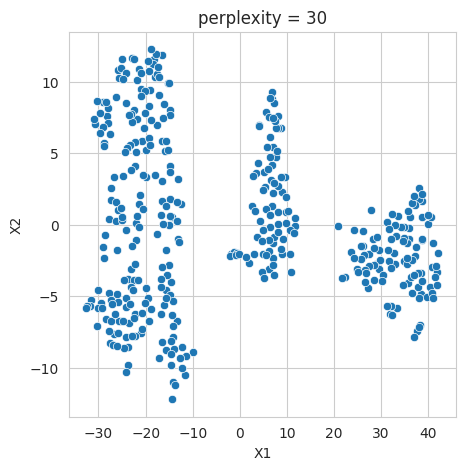

In [ ]:
# let's choose perplexity = 30
tsne = TSNE(n_components = 2, random_state = 1, perplexity = 30)

data_scaled_copy_tsne = tsne.fit_transform(data_scaled_copy)

data_scaled_tsne = pd.DataFrame(data_scaled_copy_tsne)

data_scaled_tsne.columns = ['X1', 'X2']

plt.figure(figsize = (5,5))

sns.scatterplot(x = 'X1', y = 'X2', data = data_scaled_tsne)

plt.title('perplexity = 30')

In [ ]:
data_scaled_tsne.head()

,X1,X2
0,38.090847,2.597490
1,38.661625,0.544830
2,38.675144,1.681161
3,38.065170,1.767447
4,38.766808,2.173194


In [ ]:
data_scaled_copy['X1'] = data_scaled_tsne['X1']
data_scaled_copy['X2'] = data_scaled_tsne['X2']
data_scaled_copy.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,X1,X2
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,38.090847,2.597490
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,38.661625,0.544830
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,38.675144,1.681161
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,38.065170,1.767447
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,38.766808,2.173194


#### **Visualize the clusters w.r.t different variables using scatter plot and box plot**

In [ ]:
# Let's assign points to 3 different groups on the scatter plot
def grouping(x):
    first_component = x['X1']

    second_component = x['X2']

    if first_component < -3:
        return 'group_1'

    elif (first_component < 15) and (first_component > -5):
        return 'group_2'

    else:
        return 'group_3'

In [ ]:
# Adding a column to the data_scaled_tsne dataframe which contains le label for each car/data point
data_scaled_tsne['groups'] = data_scaled_tsne.apply(grouping, axis = 1)

In [ ]:
#Visualizing the new dataframe
data_scaled_tsne.head()

,X1,X2,groups
0,38.090847,2.597490,group_3
1,38.661625,0.544830,group_3
2,38.675144,1.681161,group_3
3,38.065170,1.767447,group_3
4,38.766808,2.173194,group_3


<Axes: xlabel='X1', ylabel='X2'>

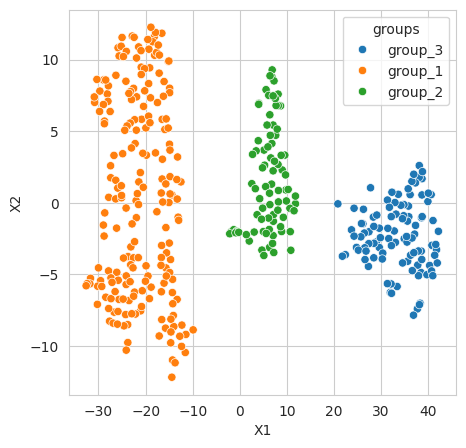

In [ ]:
# Scatter plot for two components with hue showing a clear separation between each cluster
plt.figure(figsize = (5, 5))

sns.scatterplot(x = 'X1', y = 'X2', data = data_scaled_tsne, hue = 'groups')

In [ ]:
#Add labels to the original dataframe
data_scaled_copy['groups']= data_scaled_copy.apply(grouping, axis = 1)

<Axes: xlabel='X1', ylabel='X2'>

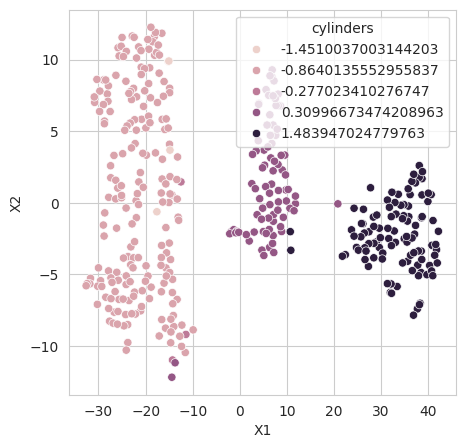

In [ ]:
# Scatter plot for two components with hue showing a clear separation between each cluster, and hue = cylinders
plt.figure(figsize = (5, 5))

sns.scatterplot(x = 'X1', y = 'X2', data = data_scaled_copy, hue = 'cylinders')

In [ ]:
data_scaled_copy.columns[0:-3]

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

mpg


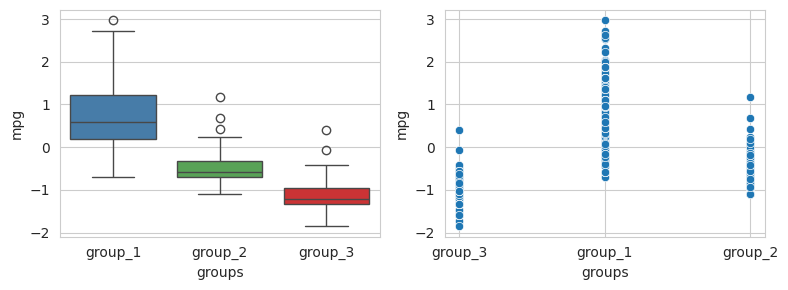

cylinders


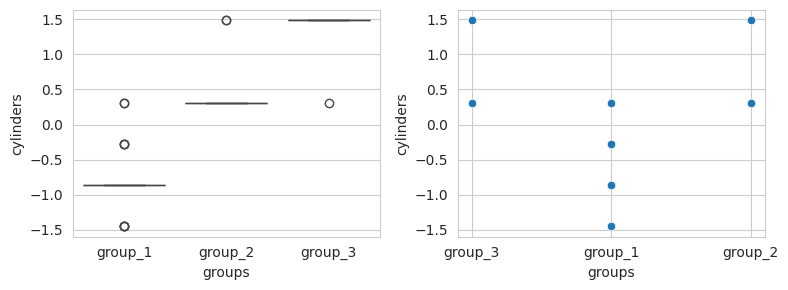

displacement


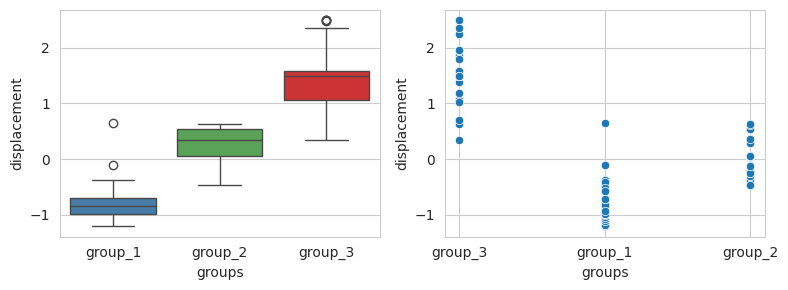

horsepower


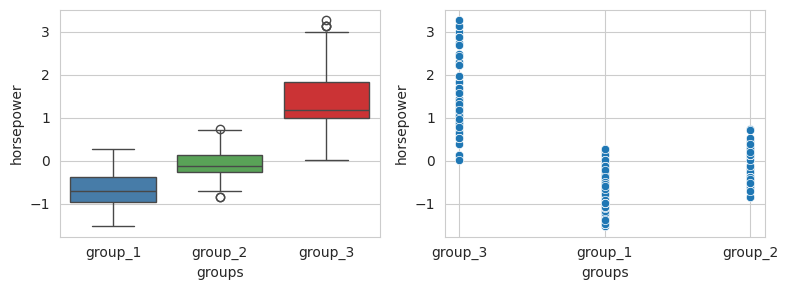

weight


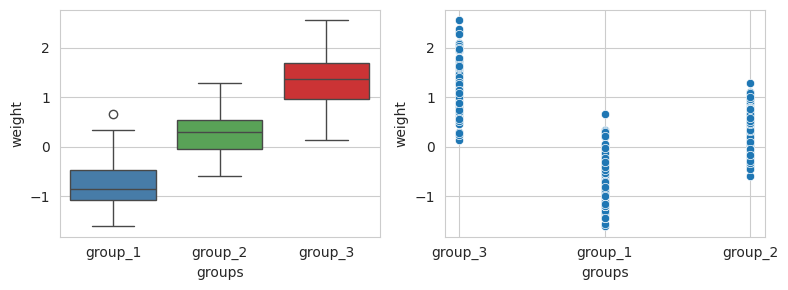

acceleration


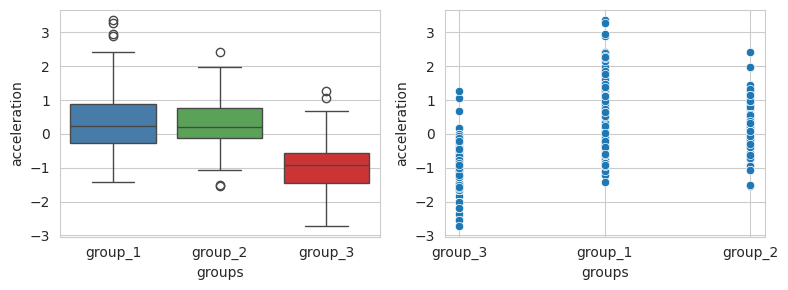

model year


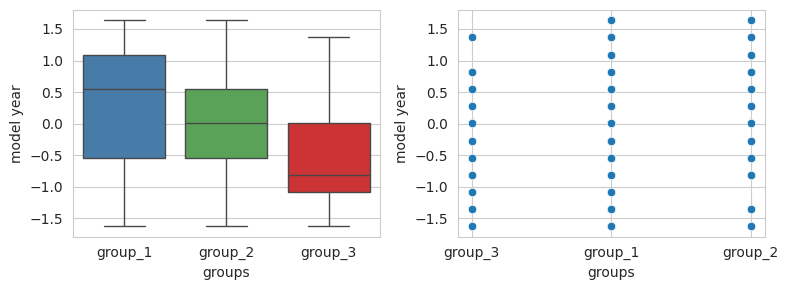

In [ ]:
#Visualise the 3 clusters against each variable using boxplot.

all_col = data_scaled_copy.columns[0:-3].tolist()


for variable in all_col:
  plt.figure(figsize = (8, 3))

  print(variable)
  plt.subplot(1, 2, 1)
  sns.boxplot(y=data_scaled_copy[variable], x=data_scaled_tsne['groups'], palette = "Set1", hue = data_scaled_tsne['groups'], legend =False, order = ['group_1','group_2','group_3'] )

  plt.subplot(1, 2, 2)
  sns.scatterplot(y=data_scaled_copy[variable], x=data_scaled_tsne['groups'])

  plt.tight_layout()


  plt.show()

**Observations:___________**

**Group 1**consists of cars with lower number of cylinders (4), they are more recent cars, lighter, lower horsepower, lower displacement, and higher mpg. These are the most recent and more fuel efficient.

**Group 2:**:  number of cylinders  is 6, a bit less recent cars, a bit more heavy, higher horsepower, higher displacement and higher displacement than group 1. Compromise between fuel efficiency and performance/power.

**Group 3:** Higher number of cylinders:  heaviest, highest horsepower, highest displacement, higher number of cylinders and lower mpg. These are the most performant ones, less fuel efficiency

## **Actionable Insights and Recommendations**

This analysis have identified 3 profiles of cars: most fuel efficient and less performant, less fuel efficient and more performant and and intermediate group, which sits in the middle for fuel efficiency and performance


This allows to **implement a recommendation system** **that suggests vehicles to customers based on the cluster they belong to**. PCA and t-SNE clusters indicate that there are distinct segments of cars based on features like cylinders, weight, horsepower, and MPG. Leverage this information to identify and target specific customer segments. For instance, customers interested in high-performance vehicles (more cylinders, higher horsepower) versus those interested in fuel efficiency (higher MPG, lower weight).If a customer shows interest in cars with high MPG, recommend other vehicles within that cluster.

**Improve Cross-Selling:** Leverage the clustering information to suggest complementary products and services. For example, customers interested in high-performance cars might be interested in premium maintenance packages or performance accessories.

